In [1]:
##BUILDING AN STRUCTURE FOR RELIABLE, CLEAR AND REPRODUCIBLE EDA

#Objectives:
#1. Generate a pipeline of techniques for analyzing and getting the best dataset possible for modeling stage
#2. Learn and incorporate all techniques I can find 

In [2]:
##Import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
%matplotlib inline

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 350)
pd.set_option('display.max_colwidth', -1) 
pd.set_option("display.max_rows", 500)
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker


# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import StandardScaler


from sklearn.compose import make_column_transformer


import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, OrthogonalMatchingPursuit, Lasso, LassoLarsIC, ElasticNet, ElasticNetCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest, RFECV, SelectFromModel
from sklearn.model_selection import train_test_split

from scipy import stats
from scipy.stats import norm, kurtosis, skew

# Import specific libraries
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest, RFECV, SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_extraction import FeatureHasher
from sklearn.decomposition import PCA, KernelPCA
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression, OrthogonalMatchingPursuit, Lasso, LassoLarsIC, ElasticNet, ElasticNetCV
from sklearn.linear_model import SGDRegressor, PassiveAggressiveRegressor, HuberRegressor, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor
import mlxtend
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
import lightgbm as lgb
# Models
import mlxtend
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

from patsy import dmatrices

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from scipy.special import boxcox1p
from patsy import dmatrices

pd.set_option('expand_frame_repr', False)

#For baseline estimations
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

from sklearn.metrics import accuracy_score


#For importing from my own libraries in src :)
import sys
from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)
    
from house_utils import data_summary, features_profile, plot_feats

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.preprocessing import LabelEncoder


from sklearn.compose import make_column_transformer
from itertools import combinations 


warnings.filterwarnings("ignore") # ignoring annoying warnings

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
pd.set_option("display.max_rows", 500)

###TO PREVENT SCROLLING : SHIFT + O

In [3]:
##UTILS FOR DATA PROCESSING

def rescaler(df, target):
#Rescaling utility
    y = df.pop(target)
    X = df
    test_ID = y.index
    scaler = StandardScaler().fit(X)
    XRescaled = scaler.transform(X)
    df_rescaled = pd.DataFrame(XRescaled, columns = X.columns, index = test_ID)
    df = pd.concat((y, df_rescaled), axis = 1)
    df.set_index(test_ID)
    print("Data has been rescaled...")
    return df

In [4]:
# READ THE WHOLE DATASET:
# We load and read the whole dataset (train + test) because we need to clean and preprocess all of it!!!!
#All the procedures must be applied to the entire dataset before split it!

#Step 1: Load train and test sets

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#Target
target = "Loan_Status"

#Change target type
dict = {"Y":1, "N":0}
train[target] = train[target].map(dict)
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0000,nan,360.0000,1.0000,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0000,128.0000,360.0000,1.0000,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0000,66.0000,360.0000,1.0000,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0000,120.0000,360.0000,1.0000,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0000,141.0000,360.0000,1.0000,Urban,1


In [5]:
#Save the 'Id' column
train_ID = train['Loan_ID']
test_ID = test['Loan_ID']

test_ID.to_csv("test_ID.csv", index = False)

#Drop ID from both datasets
# train.drop("Id", axis = 1, inplace = True)
# test.drop("Id", axis = 1, inplace = True)

# Shape of the datasets
train.shape, test.shape, train.shape[0], test.shape[0]

#Separar y convertir el target en DataFrame
y_train = train[target].to_frame()

#Step 2: Concatenate both datasets into one

df = pd.concat((train,test), sort = False).reset_index(drop = True)

#drop target and id columns
df.drop(columns = [target, "Loan_ID"], axis = 1, inplace = True)
train.drop(columns = ["Loan_ID"], axis = 1, inplace = True)
test.drop(columns = ["Loan_ID"], axis = 1, inplace = True)

target = "Loan_Status"

In [6]:
#Variable identificacion
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


In [7]:
#Labelencoding target
le = LabelEncoder()
train["Loan_Status"] = pd.Series(le.fit_transform(train[target]))

In [8]:
train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0000,nan,360.0000,1.0000,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0000,128.0000,360.0000,1.0000,Rural,0


In [9]:
train.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [10]:
# new_feats = df.copy() ##guardar para crear new features
# new_feats.Ticket = df.Ticket

In [11]:
#Summary of numerical features (train dataset)
data_summary(df = train.select_dtypes(include = "number"), target = target)

,Dtype,Uniques,Nulls,% Nulls,Skew,Kurtosis,Correlation
Loan_Status,int64,2,0,0.0000,-0.8100,-1.3480,1.0000
Credit_History,float64,2,50,0.0800,-1.8820,1.5490,0.5620
CoapplicantIncome,float64,287,0,0.0000,7.4920,84.9560,-0.0590
LoanAmount,float64,203,22,0.0400,2.6780,10.4020,-0.0370
Loan_Amount_Term,float64,10,14,0.0200,-2.3620,6.6730,-0.0210
ApplicantIncome,int64,505,0,0.0000,6.5400,60.5410,-0.0050


In [12]:
##Summary:
#Pclass and Fare as the most correlated features with Target
#Fare has a huge Kurtosis and skew, so it must me processed.
#Fare must have a significant amount of outliers to be analyzed
#Parch and SibSp also must be transformed

In [13]:
#Statistical summary of dataset (using train dataset)
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.0000,614.0000,592.0000,600.0000,564.0000,614.0000
mean,5403.4593,1621.2458,146.4122,342.0000,0.8422,0.6873
std,6109.0417,2926.2484,85.5873,65.1204,0.3649,0.4640
min,150.0000,0.0000,9.0000,12.0000,0.0000,0.0000
25%,2877.5000,0.0000,100.0000,360.0000,1.0000,0.0000
50%,3812.5000,1188.5000,128.0000,360.0000,1.0000,1.0000
75%,5795.0000,2297.2500,168.0000,360.0000,1.0000,1.0000
max,81000.0000,41667.0000,700.0000,480.0000,1.0000,1.0000


In [14]:
#Observations:
#- Only 38,4% of people survived
#There are remarkable high values in the 3rd quantile of Fare to look into
#75% of passengers declared without Parch
#75% of passengers were 38 years old or less
#There are different scales in the numerical data, so they will have to be rescaled later for modeling stage

In [15]:
#ANALYSIS OF NULLS
def nulls_summary(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent_1 = df.isnull().sum()/df.isnull().count()*100
    percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
    return missing_data[missing_data["Total"] != 0]

nulls_summary(df)

,Total,%
Credit_History,79,8.1000
Self_Employed,55,5.6000
LoanAmount,27,2.8000
Dependents,25,2.5000
Gender,24,2.4000
Loan_Amount_Term,20,2.0000
Married,3,0.3000


In [16]:
#Summary of nulls:

#Nulls in train
nulls_summary(train)

,Total,%
Credit_History,50,8.1000
Self_Employed,32,5.2000
LoanAmount,22,3.6000
Dependents,15,2.4000
Loan_Amount_Term,14,2.3000
Gender,13,2.1000
Married,3,0.5000


In [17]:
#Nulls in test
nulls_summary(test)

,Total,%
Credit_History,29,7.9000
Self_Employed,23,6.3000
Gender,11,3.0000
Dependents,10,2.7000
Loan_Amount_Term,6,1.6000
LoanAmount,5,1.4000


In [18]:
#Nulls imputation for train and test using simple median imputation

#Train nulls imputing

def impute(df, target):
    col = df.columns
    if target == "None":
        col = col.drop(target)
    else:
        pass
    num_cols = df.select_dtypes(include = "number").columns
    cat_cols = df.select_dtypes(include = "object").columns
    #Impute numeric using median
    for c in num_cols:
        df[c] = df[c].fillna(df[c].median())
    #Impute cat using mode
    for c in cat_cols:
        df[c] = df[c].fillna(df[c].mode()[0])
    
    return df
    

train = impute(train, target = target)
test = impute(test, target = None)

In [19]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [20]:
#PROCESS1: CHANGING DTYPES OF SOME FEATS
# #'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term' to int64
train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']] = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']].astype("int64")

#Credit history to object like target
train[["Credit_History", "Loan_Status"]] = train[["Credit_History", "Loan_Status"]].astype("object")



In [21]:
#Change same dtypes in test set
test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']] = test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']].astype("int64")

#Credit history to object like target
test["Credit_History"] = test["Credit_History"].astype("object")


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             614 non-null    object
 1   Married            614 non-null    object
 2   Dependents         614 non-null    object
 3   Education          614 non-null    object
 4   Self_Employed      614 non-null    object
 5   ApplicantIncome    614 non-null    int64 
 6   CoapplicantIncome  614 non-null    int64 
 7   LoanAmount         614 non-null    int64 
 8   Loan_Amount_Term   614 non-null    int64 
 9   Credit_History     614 non-null    object
 10  Property_Area      614 non-null    object
 11  Loan_Status        614 non-null    object
dtypes: int64(4), object(8)
memory usage: 57.7+ KB


In [23]:
#BINNING
num_cols = train.select_dtypes(include = "number").columns

In [24]:
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

In [25]:
train[num_cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.0000,614.0000,614.0000,614.0000
mean,5403.4593,1621.2443,145.7524,342.4104
std,6109.0417,2926.2488,84.1072,64.4286
min,150.0000,0.0000,9.0000,12.0000
25%,2877.5000,0.0000,100.2500,360.0000
50%,3812.5000,1188.5000,128.0000,360.0000
75%,5795.0000,2297.2500,164.7500,360.0000
max,81000.0000,41667.0000,700.0000,480.0000


In [26]:
#Binning the numerical features
#ApplicantIncome
bins = [-1, 3000, 5000, 90000]
labels = [1,2,3]
train['ApplicantIncome_bin'] = pd.cut(train['ApplicantIncome'], bins=bins, labels=labels)
test['ApplicantIncome_bin'] = pd.cut(test['ApplicantIncome'], bins=bins, labels=labels)

#CopplicantIncome
bins = [-1, 1000, 2000, 42000]
labels = [1,2,3]
train['CoapplicantIncome_bin'] = pd.cut(train['CoapplicantIncome'], bins=bins, labels=labels)
test['CoapplicantIncome_bin'] = pd.cut(test['CoapplicantIncome'], bins=bins, labels=labels)


#LoanAmount
bins = [8,100,300, 750]
labels = [1,2,3]
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins=bins, labels=labels)
test['LoanAmount_bin'] = pd.cut(test['LoanAmount'], bins=bins, labels=labels)

#Loan_Amount_Term
bins = [5,350,500]
labels = [1,2]
train['AmounTerm_bin'] = pd.cut(train['Loan_Amount_Term'], bins=bins, labels=labels)
test["AmounTerm_bin"] = pd.cut(test['Loan_Amount_Term'], bins=bins, labels=labels)




In [27]:
test.isnull().sum()

Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
ApplicantIncome_bin      0
CoapplicantIncome_bin    0
LoanAmount_bin           0
AmounTerm_bin            0
dtype: int64

In [28]:
test[test.AmounTerm_bin.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome_bin,CoapplicantIncome_bin,LoanAmount_bin,AmounTerm_bin


In [29]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [30]:
#Encoding categorical features
# #creating instance of one-hot-encoder
# enc = OneHotEncoder(handle_unknown='ignore')
# # passing bridge-types-cat column (label encoded values of bridge_types)

t = train.drop(target, axis = 1)
train= pd.concat((pd.get_dummies(t, drop_first = True), y_train), axis =1)
test= pd.get_dummies(test, drop_first = True)

train.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome_bin_2,ApplicantIncome_bin_3,CoapplicantIncome_bin_2,CoapplicantIncome_bin_3,LoanAmount_bin_2,LoanAmount_bin_3,AmounTerm_bin_2,Loan_Status
0,5849,0,128,360,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1
1,4583,1508,128,360,1,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0


In [31]:
###AUTOFEAT TOOLS TESTING
from autofeat import AutoFeatClassifier
t = train.copy()
y = t.pop(target)
X = t

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =0)
model = AutoFeatClassifier()
df = model.fit_transform(X, y)
y_pred = model.predict(X_test)
print("Final Accuracy: %.4f" % model.score(df, y))

Final Accuracy: 0.3127


In [32]:
from autofeat import FeatureSelector
fsel = FeatureSelector(verbose=1)
new_X = fsel.fit_transform(pd.DataFrame(X), pd.DataFrame(y))

[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 6 features after 5 feature selection runs
[featsel] 6 features after correlation filtering
[featsel] 4 features after noise filtering


In [33]:
new_X.head()

,Credit_History_1.0,Property_Area_Semiurban,Married_Yes,CoapplicantIncome
0,1,0,0,0
1,1,0,1,1508
2,1,0,1,0
3,1,0,1,2358
4,1,0,0,0


In [ ]:
train.info()

In [34]:
#####CORRELATION AND FEATURE SELECTION ANALYSIS
class Selector:
    def __init__(self):
        # self.target = target
        # self.df = df
        pass
        
    # def rescale(self, df, target):
    #     #Rescale data if necessary
    #     X2 = df.copy()
    #     y2 = X2.pop(target)
    #     scaler = StandardScaler().fit(X2)
    #     XRescaled = scaler.transform(X2)
    #     X_rescaled = pd.DataFrame(XRescaled, columns = X2.columns)
    #     print("1. Data rescaling:")
    #     print("Data has been rescaled")
    #     return pd.concat((y2, X_rescaled), axis = 1)

    def variance_selector(self, df, target):
        #Rescale data if necessary
        print("1.Variance Threshold feature selection:")
        print("")
        X2 = df.copy()
        y2 = X2.pop(target)
        print("Initial features:", X2.shape[1])
        low = [col for col in X2.columns if X2[col].std() < 0.5]
        # print("Estos son antes de escale:", low)
        # scaler = StandardScaler().fit(X2)
        # XRescaled = scaler.transform(X2)
        # X_rescaled = pd.DataFrame(XRescaled, columns = X2.columns)
        # low = [col for col in X2.columns if X[col].std() < 0.5]
        #Analysis of amount of variation and droping all features with low variance
        var_tresh = VarianceThreshold(threshold = 0.5)
        var_tresh.fit_transform(X2)
        data_transformed = X2.loc[:, var_tresh.get_support()]
        #print("Selected feat:", data_transformed.columns)
        print("Removed features:", set(X2.columns) - set(data_transformed.columns))
        print("Final features:", data_transformed.shape[1])
        print("{} features with low variance removed".format(X2.shape[1] - data_transformed.shape[1]))
        #Rejoin
        df = pd.concat((y2, data_transformed), axis = 1)
        return df


    def single_value_dominate(self, df, target):
        print("2.Removing columns with single value dominating > 95%:")
        print("")
        X2 = df.copy()
        y2 = X2.pop(target)
        remove_cols = []
        for col in X2.columns:
            count= 0
            count = sum([+1 for i in X2[col].values if i == X2[col].mode()[0]])
            if count/X2[col].shape[0] >= 0.95:
                remove_cols.append(col)
        selected_cols = set(df.columns) - set(remove_cols)
        print("Removed cols:", len(remove_cols))
        print("Total selected cols:", len(selected_cols))
        df = df[selected_cols]
        return df


    def calcDrop(self, res):
        # All variables with correlation > cutoff
        all_corr_vars = list(set(res['v1'].tolist() + res['v2'].tolist()))
        
        # All unique variables in drop column
        poss_drop = list(set(res['drop'].tolist()))

        # Keep any variable not in drop column
        keep = list(set(all_corr_vars).difference(set(poss_drop)))
        
        # Drop any variables in same row as a keep variable
        p = res[ res['v1'].isin(keep)  | res['v2'].isin(keep) ][['v1', 'v2']]
        q = list(set(p['v1'].tolist() + p['v2'].tolist()))
        drop = (list(set(q).difference(set(keep))))

        # Remove drop variables from possible drop 
        poss_drop = list(set(poss_drop).difference(set(drop)))
        
        # subset res dataframe to include possible drop pairs
        m = res[ res['v1'].isin(poss_drop)  | res['v2'].isin(poss_drop) ][['v1', 'v2','drop']]
            
        # remove rows that are decided (drop), take set and add to drops
        more_drop = set(list(m[~m['v1'].isin(drop) & ~m['v2'].isin(drop)]['drop']))
        for item in more_drop:
            drop.append(item)
            
        return drop

    def corrX_new(self, df, target, cut) :
        print("")
        print("3. Removing features with high pairwise correlation")
        # Get correlation matrix and upper triagle
        df2 = df.drop(target, axis = 1)

        corr_mtx = df2.corr().abs()
        avg_corr = corr_mtx.mean(axis = 1)
        up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(np.bool))

        dropcols = list()

        res = pd.DataFrame(columns=(['v1', 'v2', 'v1.target', 
                                        'v2.target','corr', 'drop' ]))

        for row in range(len(up)-1):
            col_idx = row + 1
            for col in range (col_idx, len(up)):
                if(corr_mtx.iloc[row, col] > cut):
                    if(avg_corr.iloc[row] > avg_corr.iloc[col]): 
                        dropcols.append(row)
                        drop = corr_mtx.columns[row]
                    else: 
                        dropcols.append(col)
                        drop = corr_mtx.columns[col]
                    
                    s = pd.Series([ corr_mtx.index[row],
                    up.columns[col],
                    avg_corr[row],
                    avg_corr[col],
                    up.iloc[row,col],
                    drop],
                    index = res.columns)
            
                    res = res.append(s, ignore_index = True)

        dropcols_names = self.calcDrop(res)
        print("{} features removed".format(len(dropcols_names)))
        print("Features removed:", dropcols_names)
        print("")
        print("Selected features:", df.shape[1] - len(dropcols_names))
        selected_cols = set(df.columns) - set(dropcols_names)
        print("")
        print("Selected:", selected_cols)
        return df[selected_cols]

    
    

    def calculate_vif_(self, X, thresh=5.0):
        cols = X.columns
        variables = np.arange(X.shape[1])
        dropped=True
        while dropped:
            dropped=False
            c = X[cols[variables]].values
            vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

            maxloc = vif.index(max(vif))
            if max(vif) > thresh:
                print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
                variables = np.delete(variables, maxloc)
                dropped=True

        print('Remaining variables:')
        print(X.columns[variables])
        return X[cols[variables]]


    def corr_target(self, df):
        print("")
        print("Remove features with low target correlation:")
        #Removes all feats with correlation under threshold
        remove_features = [feat for feat in df.columns if df.corr().abs()[[target]].loc[feat, :][0] < 0.05]
        selected_cols = set(df.columns) - set(remove_features)
        print("Total features removed:", len(remove_features))
        print("Final features selected:", len(selected_cols))

        return df[selected_cols]

In [35]:
##Remove the most correlated feats and target
scl = Selector()
df_corr = scl.corrX_new(df = train, target = "Loan_Status", cut = 0.6)
df_target =scl.corr_target(df_corr)


3. Removing features with high pairwise correlation
2 features removed
Features removed: ['LoanAmount', 'AmounTerm_bin_2']

Selected features: 20

Selected: {'ApplicantIncome', 'ApplicantIncome_bin_3', 'CoapplicantIncome_bin_3', 'Loan_Status', 'LoanAmount_bin_2', 'Property_Area_Urban', 'Credit_History_1.0', 'Married_Yes', 'Loan_Amount_Term', 'Education_Not Graduate', 'Dependents_1', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Dependents_3+', 'LoanAmount_bin_3', 'ApplicantIncome_bin_2', 'Dependents_2', 'Gender_Male', 'CoapplicantIncome_bin_2', 'CoapplicantIncome'}

Remove features with low target correlation:
Total features removed: 13
Final features selected: 7


In [36]:
#Actualizamos para testing
train = train[df_target.columns]
test_cols = set(train.columns)- set(["Loan_Status"])
test = test[test_cols]

print("Selected features:", train.columns)


Selected features: Index(['Loan_Status', 'Property_Area_Semiurban', 'Credit_History_1.0',
       'Married_Yes', 'Dependents_2', 'CoapplicantIncome',
       'Education_Not Graduate'],
      dtype='object')


In [37]:

# Credit_History_1.0
# Property_Area_Semiurban
# Married_Yes
# CoapplicantIncome


###FEATURE ENGINEERING 2021
#Data transformations
#Binarization
#Rescaling (done)

all_data = pd.concat((train.drop(target, axis = 1), test), axis = 0)

In [38]:
#Data trsnformation
###treatment of skewed features
def feat_transform(all_data):
    cols = all_data.columns
    #Seleccionamos los numeric features only (usamos cols porque esos son los feats que quedaron)
    numeric_features = all_data.loc[:, list(cols)].dtypes[(all_data.dtypes != "category") & (all_data.dtypes != "uint8")].index

    # #Calculamos los skewes y los ordenamos...
    skewed_features = all_data[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending =False)

    #Seleccionamos los que tengan un abs(skew) >0.7
    skewed_max = pd.DataFrame({"Skew": skewed_features})
    skewed_max  = skewed_max[abs(skewed_max["Skew"]) > 0.7]
    skewed_max.dropna()

    #Aplicamos ahora la BoxCox transformation
    l_opt = {}
    for f in skewed_max.index:
        all_data[f], l_opt[f] = boxcox((all_data[f] + 1))

    #Checking the results...

    skewed_features_2 = all_data[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending =False)
    sk_2 = pd.DataFrame({"Skew_before":skewed_features, "Skew_after": skewed_features_2})
    sk_2 = sk_2[abs(sk_2["Skew_before"]) > 0.7].sort_values(by = "Skew_before", ascending = False)
    print(sk_2)
    
    return all_data

In [39]:
#Transform train
train = pd.concat((feat_transform(train.loc[:, train.columns != target]), train[target]), axis = 1)

#transform test
test = feat_transform(test)

                   Skew_before  Skew_after
CoapplicantIncome 7.4732       -0.1453    
                   Skew_before  Skew_after
CoapplicantIncome 4.2399       -0.2006    


In [40]:
data_summary(df = train, target = target)

,Dtype,Uniques,Nulls,% Nulls,Skew,Kurtosis,Correlation
Loan_Status,int64,2,0,0.0000,-0.8100,-1.3480,1.0000
Credit_History_1.0,uint8,2,0,0.0000,-2.0220,2.0950,0.5410
Property_Area_Semiurban,uint8,2,0,0.0000,0.4980,-1.7580,0.1370
Married_Yes,uint8,2,0,0.0000,-0.6450,-1.5890,0.0910
Education_Not Graduate,uint8,2,0,0.0000,1.3680,-0.1300,-0.0860
Dependents_2,uint8,2,0,0.0000,1.8140,1.2960,0.0620
CoapplicantIncome,float64,287,0,0.0000,-0.1460,-1.8780,0.0570


In [ ]:
####   ####

In [41]:
##rescale end send to testing

def rescaler(df, target):
#Rescaling utility
    if target !="None":
        y = df.pop(target)
        X = df
        test_ID = y.index
        scaler = StandardScaler().fit(X)
        XRescaled = scaler.transform(X)
        df_rescaled = pd.DataFrame(XRescaled, columns = X.columns)
        df = pd.concat((y, df_rescaled), axis = 1)
        print("train data has been rescaled...")
    else:
        
        scaler = StandardScaler().fit(df)
        XRescaled = scaler.transform(df)
        df = pd.DataFrame(XRescaled, columns = df.columns)
        print("test data has been rescaled...")
    return df

train = rescaler(train, target)
test = rescaler(test,target = "None")

train data has been rescaled...
test data has been rescaled...


In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
train.info()

In [ ]:
train.columns

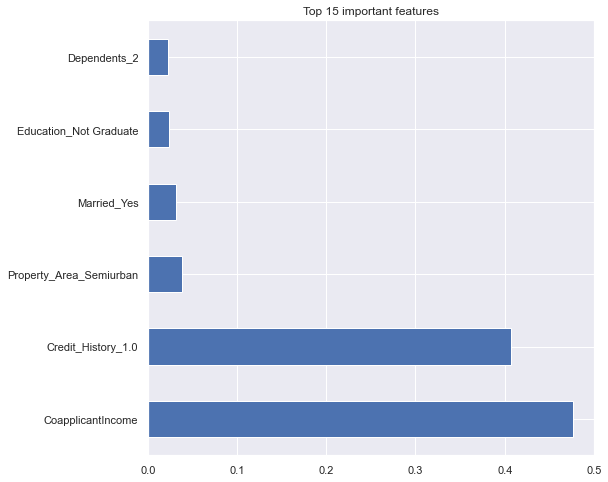

In [42]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
t = train.copy()
y = t.pop(target)
X = t
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_

###
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()


# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

In [43]:
new_test = ["Credit_History_1.0","Property_Area_Semiurban","Married_Yes","CoapplicantIncome"]
new_train = ["Credit_History_1.0","Property_Area_Semiurban","Married_Yes","CoapplicantIncome", "Loan_Status"]

In [44]:
##Sending data for baseline test (entering data_split.py):

train[new_train].to_csv("new_train_final.csv", index = False)
test[new_test].to_csv("new_test_final.csv", index = False)




In [ ]:
#################################################################################

In [ ]:
data_summary(df = train, target = target)

In [ ]:
df.to_csv("loan_comp.csv", index = False)

In [ ]:
t = pd.read_csv("submission_test56.csv")
t.head()

In [ ]:
##UNIVARIATE VISUAL ANALYSIS:
#Check tha distribution of each feature and draw useful information
#We will use the separation we made (continuous, discrete, categorical) to plot accodingly 

#Points to check:

#Cómo es la forma de la distribucion? #es una distribucion simetrica?
#"The shape of the distribution is a fundamental characteristic of your sample
#that can determine which measure of central tendency best reflects the center of your data".
#Also the shape also impacts your choice between using a parametric or nonparametric hypothesis test.
#Cuál es el valor más típico
#Lo datos estàn dispersos o no?
#Si no, cómo es?
#El promedio estará alterado por la presencia de outliers , como acá

In [ ]:
#1. CONTINUOUS FEATURES
#For continuous data we must use the histogram

#LoanAmount
g = sns.displot(train.LoanAmount, bins = 25,  binwidth=20)
g.fig.set_figwidth(12)
g.fig.set_figheight(5.7)
plt.title("Mode: {}, median :{}, mean:{}".format(train.LoanAmount.mode()[0], train.LoanAmount.median(), np.round(train.LoanAmount.mean(),2)))
plt.show()
    

In [ ]:
#Cómo es la forma de la distribucion? #es una distribucion simetrica? No es simétrica, right-skewed
#"The shape of the distribution is a fundamental characteristic of your sample
#that can determine which measure of central tendency best reflects the center of your data".
#Also the shape also impacts your choice between using a parametric or nonparametric hypothesis test.
#Cuál es el valor más típico: mode: 120
#Lo datos estàn dispersos o no?: Existen outliers evidentes en el extremo derecho, que tiran el promedio hacia arriba
#Si no, cómo es?
#El promedio estará alterado por la presencia de outliers , como acá

In [ ]:

#ApplicantIncome
g = sns.displot(train, x= "ApplicantIncome", bins = 30)
g.fig.set_figwidth(12)
g.fig.set_figheight(5.7)
plt.title("Mode: {}, median :{}, mean:{}".format(train.ApplicantIncome.mode()[0], train.ApplicantIncome.median(), train.ApplicantIncome.mean()))
plt.show()


In [ ]:
#Cómo es la forma de la distribucion? #es una distribucion simetrica?: Es simétrica, con un peak a la izquierda a analizar
#y además right skewed con algunos valores altos (alrededor de 80)
#"The shape of the distribution is a fundamental characteristic of your sample
#that can determine which measure of central tendency best reflects the center of your data".
#Also the shape also impacts your choice between using a parametric or nonparametric hypothesis test.
#Cuál es el valor más típico: Mode = 24 años
#Lo datos estàn dispersos o no?: Hay dispersión hacia la derecha, pero en gral se ve simétrica
#Si no, cómo es?
#El promedio estará alterado por la presencia de los outliers , como acá

In [ ]:
#Age and Sex: male
t = train[train.Sex == "male"]
g = sns.displot(train[train.Sex == "male"], x= "Age", bins = 30)
g.fig.set_figwidth(12)
g.fig.set_figheight(5.7)
plt.title("Mode: {}, median :{}, mean:{}".format(t.Age.mode()[0], t.Age.median(), t.Age.mean()))
plt.show()


In [ ]:
#Age and Sex: female
t = train[train.Sex == "female"]
g = sns.displot(t, x= "Age", bins = 30)
g.fig.set_figwidth(12)
g.fig.set_figheight(5.7)
plt.title("Mode: {}, median :{}, mean:{}".format(t.Age.mode()[0], t.Age.median(), t.Age.mean()))
plt.show()


In [ ]:
##ANALYSIS:
# Male: Symetric distribution with right skewness. More disperse ages, with typical value of 19
#Female: Symetric distribution with right skewness.Les disperse than men, with typical value of 24 years old

In [ ]:
#Revisemos además los valores de la izquierda, correspondientes a los menores:
children = train[train.Age <14]
g = sns.displot(children, x= "Age", bins = 25)
g.fig.set_figwidth(12)
g.fig.set_figheight(5.7)
plt.title("Mode: {}, median :{}, mean:{}".format(children.Age.mode()[0], children.Age.median(), children.Age.mean()))
plt.show()

In [ ]:
#Niños: distribución
#Valor típico:mode: 2 años
#Distribución trimodal, con peaks en 2,4, y 9 años como los más frecuentes valores
#Valores dispersos


In [ ]:
#2. DISCRETE FEATURES
#num_discrete = ['PassengerId', 'Survived', 'Pclass', 'SibSp','Parch']

#Here I can use the countplot (barplot) to check the distribution

#SURVIVED
g = sns.countplot(x= "Survived" ,data= train)
plt.title("{}: {}% survived".format("Survived", np.round(train[train.Survived == 1].shape[0]/ train.shape[0], 2)))

    

In [ ]:
#Pclass
g = sns.countplot(x= "Pclass" ,data= train)
train.Pclass.value_counts(normalize = True)

In [ ]:
#Mas de la mitad de la gente estaba en la 3ra clase


#SibSp
g = sns.countplot(x= "SibSp" ,data= train)
train.SibSp.value_counts(normalize = True)

In [ ]:
#La mayoria de la gente (91%) viajaba sin esposas/hermanos o a lo más declaraba 1

In [ ]:
#Parch
#Parch
g = sns.countplot(x= "Parch" ,data= train)
train.Parch.value_counts(normalize = True)

In [ ]:
#Mayoritariamente vemos viajando gente con a lo más 1 padre/niño (76% declara 0)

In [ ]:
##Importante: vemos que podría establecerse una categoría GRUPO FAMILIAR = Persona + Sibsp + Parch para cada pasajero

In [ ]:
t2 = train.copy()
t2["Family"] = t2["Parch"] * t2["SibSp"] 
data_summary(df = t2.select_dtypes(include = "number"), target = "Survived")

In [ ]:
#En principio la correlación obtenida con target no es mejor que la de Parch

In [ ]:
#Revisemos el resto de las variables, que son categoricas

categ_nominal = ['Sex', "Name",'Ticket', 'Cabin', 'Embarked']

In [ ]:
#Sex
g = sns.countplot(x= "Sex" ,data= train)
train.Sex.value_counts(normalize = True)

In [ ]:
# 2/3 de los pasajeros eran de sexo masculino

In [ ]:
#Embarked
g = sns.countplot(x= "Embarked" ,data= train)
train.Embarked.value_counts(normalize = True)

In [ ]:
# Más del 72% de la gente se embarcó desde S

In [ ]:
#Cabin, ticket y name los dejaré para revisarlos más adelante


In [ ]:
#RESUMEN OBSERVACIONES UNIVARIATE ANALYSIS

#We see outliers in Age and Fare, that are worthwhile to check and see if they can be treated
##Mayoritariamente vemos viajando gente con a lo más 1 padre/niño (76% declara 0) (Parch)
##Importante: vemos que podría establecerse una categoría GRUPO FAMILIAR = Persona + Sibsp + Parch para cada pasajero
#Mas de la mitad de la gente estaba en la 3ra clase
#Distribución trimodal DE NIÑOS, con peaks en 2,4, y 9 años como los más frecuentes valores
# 2/3 de los pasajeros eran de sexo masculino
# Más del 72% de la gente se embarcó desde S
#Edad típica de hombres menor que mujeres y con mayor dispersión (0-80 versus 0-65 aprox)




In [ ]:
#BIVARIATE ANALYSIS: Check the relationships of the features with the target variable

#Summary:
num_discrete = ['PassengerId', 'Survived', 'Pclass', 'SibSp',
       'Parch']
num_continuous = ['Age',  'Fare']
categ_nominal = ['Sex', "Name",'Ticket', 'Cabin', 'Embarked']

In [ ]:
#SEX/SURVIVED

#General view
g = sns.countplot(x= "Sex" ,data= train, hue = "Survived")



In [ ]:
train[(train.Sex == "male")].Survived.value_counts(normalize = True)


In [ ]:
train[(train.Sex == "female")].Survived.value_counts(normalize = True)


In [ ]:
#Let´s look into the distribution of sex/survival/age
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(10, 15))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=50, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')



In [ ]:
print(women[women['Survived']==1].Age.mode()[0])


In [ ]:
#Mujeres: mayor prob surv. entre 15 y 35 años. Mayor dispersión de edades de supervivientes que de fallecidos
#Mujeres: fallecidas curva asimetrica con multiples valores tipicos, pero que no superan fecuencias de 5 en cada caso
#Hombres: Fallecidos muestra curva right- skew con dispersión importante de edades. Mayor cantidad de fallecidos entre
#los 17 y 35 años aproximadamente
#Hombres sobrevivientes: Entre los 18 y 40 años mayor probabilidad de supervivencia, Entre 60 y 75 no hay chance (pero si en mujeres). 
#Hombres: valor típico de supervivencia niños 0-5 años

#Puede ser interesante generar bins de edades para ver su correlación, ya que se ven claramente rangos másmenos expuestos

In [ ]:
##distribution of sex/survival/Embarked
survived = 'survived'
not_survived = 'not survived'
# fig, axes = plt.subplots(nrows=4, ncols=1,figsize=(10, 15))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']

g = sns.countplot(x= "Embarked",data= women[women['Survived']== 0])
g.set_title("Women survived by Embarked")
plt.show()
g = sns.countplot(x= "Embarked",data= women[women['Survived']== 1])
g.set_title("Women not-survived by Embarked")

plt.show()
g = sns.countplot(x= "Embarked",data= men[men['Survived']== 0])
g.set_title("Men survived by Embarked")

plt.show()
g = sns.countplot(x= "Embarked",data= men[men['Survived']== 1])
g.set_title("Men not-survived by Embarked")

plt.show()





In [ ]:
#Análisis porcentual de cada caso:
#Se calcula que S = 31% mujeres fallecidas, Q = 25% y C = 12,3%
women[women.Survived == 1].groupby(["Embarked"]).Survived.count() 

In [ ]:
#Análisis porcentual de cada caso:
#Se calcula que S = 82,5% hombres fallecidos, Q = 92% y C = 69%
men[men.Survived == 1].groupby(["Embarked"]).Survived.count() 

In [ ]:
#Notable es que el menor % de fallecidos tanto en hombres como mujeres se ve en los que se embarcaron en C. Por qué?

#Podemos crear un feature = EMBARKED+ _+ SEX (correlación con target de -0.37)

In [ ]:
#3.PCLASS
#Veamos la distribución de edades de sobrevivientes/no sobrevivientes según Pclass 

grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=5.5, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();


##Se aprecia la mayor dispersión y cantidad de personas fallecidas en la 3ra clase

In [ ]:
#cHECKING PCLASS, SEX, SURVIVED

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(10, 15))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Pclass.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Pclass.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Pclass.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Pclass.dropna(), bins=50, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')


In [ ]:
##Claramente las mayores pprobabilidades de supervivencia de mujeres son en 1ra y 2da clase. En 3ra es de 50%
#La mayor probabilidad de fallecimiento de hombres está en 3ra clase 

#INTERESANTE CREAR UN NUEVO FEATURE PCLASS +"_"+SEX

In [ ]:
#CODE FOR ENGINEERING A NEW CATEGORICAL FEATURE 
# t = train.copy()
# t["port_sex"] = t.Pclass.astype("str") +"_"+ t.Sex.astype("str")
# t.port_sex = t.groupby(["port_sex"])["PassengerId"].transform("count")

In [ ]:
df.columns

In [ ]:
#Sex/Sibsp/Survived

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(10, 15))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].SibSp.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].SibSp.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].SibSp.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].SibSp.dropna(), bins=50, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [ ]:
#Vemos que las mujeres con 0 ó 1 SibSp tienen mayores probabilidades de sobrevivir. A partir de 5 ya no lo logran
#Igualmente los hombres, aunque con muchos menos sobrevivientes. Hay correlación aparente ahí
#INTERESANTE CREAR UN NUEVO FEATURE CON SIBSP+SEX: tiene un corr de -0.35

In [ ]:
t = train.copy()
t["port_sex"] = t.SibSp.astype("str") +"_"+ t.Sex.astype("str")
t.port_sex = t.groupby(["port_sex"])["PassengerId"].transform("count")
t.port_sex.corr(t.Survived)

In [ ]:
#Agreguemos una variante estudiando un feature de familiy = Parch + SibSp
t = train.copy()
t["Family"] = t["SibSp"] + t["Parch"]

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(10, 15))
women = t[t['Sex']=='female']
men = t[t['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Family.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Family.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Family.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Family.dropna(), bins=50, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [ ]:
#Se repite la tendencia
#INTERESANTE CREAR UN FEATURE FAMILY = SIBSP + PARCH

In [ ]:
#Dropping passengerId, ya que no aporta 
# train.PassengerId.corr(train.Survived)

In [ ]:
# train.drop("PassengerId", axis =1, inplace = True)
# test.drop("PassengerId", axis =1, inplace = True)
# df.drop("PassengerId", axis =1, inplace = True)

In [ ]:
##WORK WITH NULLS AND MISSING DATA
nulls_summary(df)

In [ ]:
#NULLS IN CABIN
df.Cabin.unique()

In [ ]:
##En el barco había 8 decks, cada uno con una letra . La cabina comenzaba por el deck correspondiente
##Por eso es posible hacer un nuevo feature que asigne el deck correspondiente a cada persona
#Se armará un feature llamado Deck, en base a la letra de cada deck, que luego se convierte en int
#Los nan quedarán como 0

import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
df['Cabin'] = df['Cabin'].fillna("U") #antes se rellenan los nan con U para que no molesten
df['Deck'] = df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group()) #extrae la letra del Cabin

#Creo un feature que cuenta las ocurrencias de cada cabin por id
df["countDeck"] = df.groupby(["Deck"])["PassengerId"].transform("count")

#Además tendremos el feat de mapeo numérico de Deck
# df['Deck'] = df['Deck'].map(deck)
# df['Deck'] = df['Deck'].fillna(0)
# df['Deck'] = df['Deck'].astype(int)

In [ ]:
df.head()

In [ ]:
# df[df["Survived"] !=-1].Deck.corr(df[df["Survived"] !=-1].Survived) #igual sirve porque tiene buena correlación con target

In [ ]:
#Se elimina Cabin y se actualizan df, train y test
df.drop(["Cabin"], axis =1, inplace = True)
train = df[df["Survived"] !=-1]
test = df[df["Survived"] ==-1]

In [ ]:
###NULLS IN AGE
#Hay 263 nulls en total para el feature Age

#TRUCO CHINO: Probaré un truco consistente en calcular el mean de Age del train set, el std delAge del test set y reemplazar
#todos los valores nan de Age con números random generados a +- 1 std del mean
#Nota:uso el mean como valor típico dado que Age tiene una distribución bastante simétrica (ver statistics with Jim)

data = [train, test]

for dataset in data:
    mean = train.Age.mean()
    std = test.Age.std()
    nr_nulls = dataset.Age.isnull().sum() #nro de nulls de Age en cada set
    #genero los nros random de enteros según la regla
    rand_age = np.random.randint(mean-std, mean + std, size = nr_nulls)
    #Fill de Nan
    age_slice = dataset.Age.copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset.Age = age_slice
    dataset.Age = dataset.Age.astype(int)
    
        

In [ ]:
#Vuelvo a unir train y test en df
df = pd.concat([train, test], axis = 0).reset_index(drop = True)

In [ ]:
df.isnull().sum()

In [ ]:
#EMBARKED
#Como embarked tiene solo 2 valores nan, hago fill con su valor tipico
df.Embarked.value_counts()

In [ ]:
df.Embarked = df.Embarked.fillna("S")

In [ ]:
#Fare
#Segun Jim, dado que Fare tiene una distribución con skewed y es un dato continuo, reemplazo con la mediana
df.Fare = df.Fare.fillna(df.Fare.median())

In [ ]:
df.isnull().sum()

In [ ]:
#Ahora que imputé todos los nulls, actualizo train y test
train = df[df["Survived"] !=-1]
test = df[df["Survived"] ==-1]

In [ ]:
#OUTLIERS!!!!!
#Treebased models are robust to outliers, so we won´t them in this project
#Source: https://www.quora.com/Why-are-tree-based-models-robust-to-outliers


In [ ]:
##CONVERT AND ENCODE DATA 

In [ ]:
df.info()

In [ ]:
##CUANDO USAR LabelEncoding:
#De acuerdo al libro de Abishek, se puede usar en todos los Tree based models (dt, rf, extra trees) o bien
# en todos los boosted trees models (xgboost, GBM, lightGBM)
#NO USAR EN LINEAR MODELS, SVM O EN NN, DADO QUE ELLOS NECESITAN CONSUMIR LOS DATOS NORMALIZADOS O ESTANDARIZADOS

In [ ]:
#Como acá vamos a trabajar con tree-based y boosted trees, así que podemos usar el LabelEncoding sin problemas

In [ ]:
##CONVERTIR DATA TYPES Y ENCODING
#Convert Fare from float to int
df.Fare = df.Fare.astype("int")


In [ ]:
#Convert Sex
# dict = {"male": 0, "female":1}

# df.Sex =  df.Sex.map(dict)

In [ ]:
#Convert Embarked
#Usaremos label encoding
# dict = {"S": 0, "C": 1, "Q": 2}

# df.Embarked =  df.Embarked.map(dict)


In [ ]:
df.head()

In [ ]:
#Ticket
df.Ticket.value_counts(normalize= True)

In [ ]:
#Hay demasiados valores unicos como para que valga la pena convertirlos,d e manera que los eliminamos
ticket_backup = df.Ticket #respaldo
df.drop(["Ticket"], axis =1, inplace = True)

In [ ]:
df.head()

In [ ]:
#Name
#Se crea un nuevo feature llamado title, extrayendo los títulos de cada pasajero y transformándolos encategorías
#Luego se mapea cada categoría con un int para transformarla en numérica con LabelEncoding


df["Title"] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)# extraen los str que terminen en un punto
#Reemplazo los menor frecuentes con un "Rare"
df.Title = df.Title.replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
#Ajusto y reemplazo mme, ms, me con Miss y Mrs
df.Title = df.Title.replace(["Ms", "Mlle"], "Miss")
df.Title = df.Title.replace("Mme", "Mrs")

df.to_csv("titanic.csv")

# #Mapeamos para hacer un LabelEncoding
# dict = {'Mr':1, 'Miss':2,'Mrs':3,  'Master':4, 'Rare':5}
# df.Title = df.Title.map(dict)
# #Por si acaso se rellena cualquier nan con 0
# df.Title = df.Title.fillna(0)

#Ahora elimino Name
df.drop("Name", axis = 1, inplace = True)
#Actualizo train y test
train = df[df["Survived"] !=-1]
test = df[df["Survived"] ==-1]


In [ ]:

df.head()

In [ ]:
df.isnull().sum()

In [ ]:
#Hagamos un primer test del output del EDA
# train.to_csv("../input/train_1.csv", index = False)

In [ ]:
train.head()

In [ ]:
df.loc[:, "Survived"].values

In [ ]:
###FEATURE ENGINEERING
#LAB EXPERIMENT: WE WILL CREATE AS MUCH FEATURES AS WE CAN AND LET DE EATURE IMPORTANCE DECIDE which ones are the best
##NEW FEATURES:
# GRUPO FAMILIAR = Persona + Sibsp + Parch para cada pasajero
# #Podemos crear un feature = EMBARKED+ _+ SEX (correlación con target de -0.37)
# #INTERESANTE CREAR UN NUEVO FEATURE PCLASS +"_"+SEX
# INTERESANTE CREAR UN NUEVO FEATURE CON SIBSP+SEX: tiene un corr de -0.35


In [ ]:
#1. Family
df.Family = 1 + df.SibSp + df.Parch

In [ ]:
#SibSp+Sex (usamos la técnica de Abishek: unimos primero como caregoricas, luego sacamos sus frcuencias y a cada
#una se le asigna la frecuencia)
df["port_sex"] = df.SibSp.astype("str") +"_"+ df.Sex.astype("str")
df.port_sex = df.groupby(["port_sex"])["Deck"].transform("count")


In [ ]:
#Pclass+Sex (usamos la técnica de Abishek: unimos primero como caregoricas, luego sacamos sus frcuencias y a cada
#una se le asigna la frecuencia)
df["port_sex"] = df.Pclass.astype("str") +"_"+ df.Sex.astype("str")
df.port_sex = df.groupby(["port_sex"])["Deck"].transform("count")


In [ ]:
#Embarked+Sex (usamos la técnica de Abishek: unimos primero como caregoricas, luego sacamos sus frcuencias y a cada
#una se le asigna la frecuencia)
df["port_sex"] = df.Embarked.astype("str") +"_"+ df.Sex.astype("str")
df.port_sex = df.groupby(["port_sex"])["Deck"].transform("count")


In [ ]:
#Otros features:

In [ ]:
#Age*Pclass
df.AgeClass = df.Age * df.Pclass


In [ ]:
df.head()

In [ ]:
#Actualizo los datasets
train = df[df["Survived"] !=-1]
test = df[df["Survived"] ==-1]

In [ ]:
%store train
%store test

In [ ]:
##Let´s check...
#Hasta el momento (14/11): mejor accuracy 0.78947 usando GradientBoosting y los features. Lugar 1.600
train.columns

In [ ]:
#Nexto to work on: Ensemble learning and new features

In [ ]:
int(0.65 + 0.1)

In [ ]:
df.Survived.mean()

In [ ]:
# NEW FEATURES (22/11/2020)
#url: https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial

In [ ]:
df.head()

In [ ]:
new_feats= df.copy()

In [ ]:
#FARE binning
#Convertir a bins los rangos de fare
new_feats['rank'] = new_feats['Fare'].rank(method='first')

new_feats['Fare'] = pd.qcut(new_feats["rank"].values, 13).codes

In [ ]:
new_feats.drop("rank", axis = 1, inplace = True)

In [ ]:
##AGE BINNING
new_feats['rank'] = new_feats['Age'].rank(method='first')
new_feats['Age_bin'] = pd.qcut(new_feats["rank"].values, 10).codes
new_feats.drop("rank", axis = 1, inplace = True)



In [ ]:
##Family size
new_feats["FamilySize"] = 1 + new_feats.SibSp + new_feats.Parch

#Family Size with 1 are labeled as Alone
#Family Size with 2, 3 and 4 are labeled as Small
#Family Size with 5 and 6 are labeled as Medium
#Family Size with 7, 8 and 11 are labeled as Large


def assign(s):
    if s ==1:
        s = "Alone"
    elif 2<= s <=4:
        s = "Small"
    elif 5<= s <= 6:
        s= "Medium"
    elif 7<= s <= 11:
        s ="Large"
    return s
        


new_feats.FamilySize = new_feats.FamilySize.apply(assign)


In [ ]:
#Le aplico el método de Abihsek para que se convierta en frecuencias

new_feats["Count_FamilySize"] = new_feats.groupby(["FamilySize"])["Deck"].transform("count")

In [ ]:
new_feats.head()

In [ ]:
new_feats.info()

In [ ]:
new_feats.head()

In [ ]:
###Ticket frquency
new_feats["Ticket"] = ticket_backup
new_feats["Ticket_freq"] = new_feats.groupby("Ticket")["Ticket"].transform("count")

In [ ]:
new_feats.Ticket_freq

In [ ]:
new_feats.columns

In [ ]:
new_feats = new_feats[['Age_bin', 'FamilySize', 'Ticket_freq']] ##version final new feats

In [ ]:
#Concatenar y crear nuevo datset 
df2 = pd.concat((df,new_feats), axis = 1)
df2.drop("Age", axis = 1, inplace = True)

In [ ]:
df2.head()

In [ ]:
#Remove duplicated columns
df2 = df2.loc[:,~df2.columns.duplicated()]

In [ ]:
##Nuevos train y test
train2 = df2[df2.Survived!= -1]
test2 = df2[df2.Survived == -1]
# test2.drop("Survived", axis = 1, inplace = True)
# df2.drop("Survived", axis = 1, inplace = True) #Dejo el df2 sin el target para procesar todo

In [ ]:
a = df2[["PassengerId", "Parch", "Sex"]]

In [ ]:
y = a.pop("Sex")
y.name

In [ ]:
a.columns

In [ ]:
b = 

In [ ]:
##Save the data for using in pipeline Framework
df2.to_csv("titanic_total.csv", index = False)
train2.to_csv("titanic_train.csv", index = False)
test2.to_csv("titanic_test.csv", index = False)


In [ ]:
df2.head()

In [ ]:
for i in range(1):
    print(i)

In [ ]:
####FEAT IMPORTANCE ORIGINAL
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd 
import numpy as np

import config
import os
import joblib 
import glob

import yellowbrick
from yellowbrick.model_selection import FeatureImportances


##FEATURE IMPORTANCE

def feat_importance(all_files, X_train, y_train):
    # nrows = 3
    # ncols = 1
    # fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))
        names_classifiers = []
        nclassifier = 0
        # all_files = glob.glob("../models" + "/*.bin")
        for filename in all_files:
                model = joblib.load(filename)
                names_classifiers.append((filename, model.best_estimator_))

        for name, model in names_classifiers:
            viz = FeatureImportances(model)
            viz.fit(X_train, y_train)
            viz.show()


    # for row in range(nrows):
    #     print(row)
    #     for col in range(ncols):
    #         print("Col:", col)
    #         name = names_classifiers[nclassifier][0]
    #         classifier = names_classifiers[nclassifier][1]
    #         indices = np.argsort(classifier.feature_importances_)[::-1][:40]
    #         g = sns.barplot(y=X_train.columns[indices][:40], 
    #         x = classifier.feature_importances_[indices][:40] , 
    #         orient='h',ax=axes[row][col])
    #         g.set_xlabel("Relative importance",fontsize=12)
    #         g.set_ylabel("Features",fontsize=12)
    #         g.tick_params(labelsize=9)
    #         g.set_title(name + " feature importance")
    #         nclassifier += 1
    #         print("ready col", col)
    # plt.show()



if __name__ == "__main__":
    
    df = pd.read_csv(config.DF)
    target = config.TARGET
    num_folds = config.FOLDS
    kfold = StratifiedKFold(n_splits = num_folds)
    seed = config.SEED
    X_train =  pd.read_csv("../input/X_train.csv")
    y_train =  pd.read_csv("../input/y_train.csv").values.ravel()
    scoring = config.SCORING
    all_files = glob.glob("../models/bestModels" + "/*.bin")
    feat_importance(all_files, X_train, y_train)

    
    #

In [ ]:
 from sklearn import svm, datasets
 from sklearn.model_selection import GridSearchCV


 iris = datasets.load_iris()
 parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
 svc = svm.SVC()
 clf = GridSearchCV(svc, parameters)
 clf.fit(iris.data, iris.target)
gs = GridSearchCV(estimator=svc,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
 sorted(clf.cv_results_.keys())


In [ ]:
print(gs.std_test_score)

In [ ]:
clf.cv_results_

In [ ]:
clf.cv_results_["std_test_score"].mean()

In [ ]:
import xgboost